# Garbage, Sewage, Road and Street Lamp Image Classifier
This notebook uses **Transfer Learning** with MobileNetV2 to classify images into one of three categories:
- Garbage
- Streetlamp
- Sewage

You need to upload your dataset in this structure:
```
dataset/
├── train/
│   ├── garbage/
|   ├── road/
│   ├── streetlamp/
│   └── sewage/
├── val/
│   ├── garbage/
|   ├── road/
│   ├── streetlamp/
│   └── sewage/
```


In [1]:
# Step 1: Install dependencies
%pip install tensorflow

In [2]:
# Step 2: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
# Step 3: Data preparation (mount Google Drive or upload to Colab)
from google.colab import drive
# drive.mount('/content/drive')

train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 289 images belonging to 4 classes.
Found 76 images belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
import zipfile
import os
uploaded = files.upload()

zip_filename = list(uploaded.keys())[0]  # Get the uploaded zip filename
extract_folder = "/content/your_folder_name"  # Change this to your desired folder name

# Create the folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted '{zip_filename}' to '{extract_folder}'")


Saving val.zip to val.zip
Extracted 'val.zip' to '/content/your_folder_name'


In [ ]:
import os

print("Train classes:", os.listdir('/content/dataset/train'))
print("Val classes:", os.listdir('/content/dataset/val'))


Train classes: ['garbage', 'sewage', 'streetlamp', 'road']
Val classes: ['garbage', 'sewage', 'streetlamp', 'road']


In [ ]:
# Step 4: Model definition
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.models import load_model
# Step 5: Train the model
model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.4548 - loss: 1.5362 - val_accuracy: 0.7237 - val_loss: 0.7724
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7772 - loss: 0.5990 - val_accuracy: 0.7763 - val_loss: 0.5675
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8886 - loss: 0.3555 - val_accuracy: 0.8421 - val_loss: 0.4595
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9096 - loss: 0.2744 - val_accuracy: 0.7632 - val_loss: 0.5776
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9298 - loss: 0.2159 - val_accuracy: 0.7632 - val_loss: 0.6293
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.8963 - loss: 0.2971 - val_accuracy: 0.7763 - val_loss: 0.5961
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.8626 - loss: 0.3999 - val_accuracy: 0.7895 - val_loss: 0.5048
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9514 - loss: 0.1752 - val_accuracy: 0.7895 - val_loss:

In [ ]:
# Step 6: Save the model
model.save('waste_classifier.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


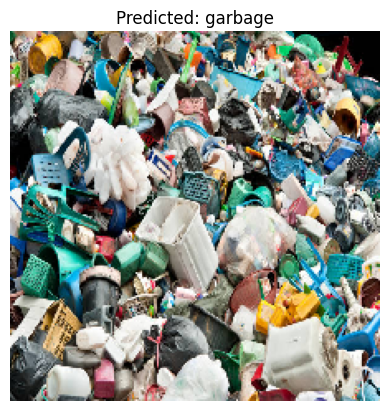

In [ ]:
# Step 7: Predict a single image
def predict_image(img_path, model, class_names):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0
    preds = model.predict(x)
    predicted_class = class_names[np.argmax(preds)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Usage:
class_names = ['garbage', 'streetlamp', 'sewage', 'road']
predict_image('/content/img.jpg', model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


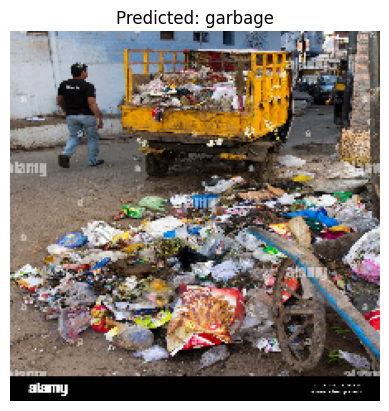

✅ Predicted class: garbage


In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('waste_classifier1.h5')

# Define your class names in the same order used during training
class_names = ['garbage', 'road', 'streetlamp', 'sewage']

# Function to load and preprocess image
def load_and_prep_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize (if model was trained with normalization)
    return img_array, img

# Path to your test image
img_path = 'test.jpg'

# Load + preprocess + predict
img_array, original_img = load_and_prep_image(img_path)
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_label = class_names[predicted_class_index]

# Display image with predicted label
plt.imshow(original_img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()

# Also print it
print(f"✅ Predicted class: {predicted_label}")
